# Lecture 5: Linear Algebra and Linear Regression

## 10/20/2019

### Table of Contents
* [Linear Algebra](#linear_algebra)  
    * [Motivation](#motivation)  
    * [Notation](#notation)  
    * [Matrix Terminology](#terminology) 
    * [Matrix Operations](#operation) 
        * [Transpose](#transpose)
        * [Addition & Subtraction](#addsub)
        * [Scalar Multiplication](#scalar_mul)
        * [Matrix Multiplication](#matrix_mul)
    * [Linear Independence](#linear_independence) 
    * [Invertibility](#invert) 

* [Regression](#regression)
    * [Introduction](#intro)
        * [What Is A Model?](#what_model)
        * [Why Make A Model?](#why_model)
    * [Linear Regression](#linear_regression)
        * [Simple Linear Regression](#simple)
        * [Loss and the Line of Best Fit](#loss)
        * [Ordinary Least Squares](#ols)
        * [Making the Model](#making_model)
        * [Interpreting the Model](#interpreting_model)
        * [Assessing the Model](#assessment)
            * [Coefficient of Determination ($R^2$)](#r_squared)
            * [Residual Plots](#residual_plots)
        * [When Can I Use A Linear Model?](#when_to_use)
        * [Multiple Linear Regression](#multiple)


### Hosted by and maintained by the [Student Association for Applied Statistics (SAAS)](https://susa.berkeley.edu). Authored by [Thomas Glezen](mailto:tcglezen@berkeley.edu) and [Yiming Shi](mailto:ys1998@berkeley.edu)

<a id='linear_algebra'></a>
# Linear Algebra

<a id='motivation'></a>
## Motivation
Linear algebra is the study of vector spaces, and it encompasses linear equations and functions represented by vector spaces and matrices. Vectors and matrices are essential for storing data, which is why we often use Python packages such as Numpy and Pandas. A common problem is linear regression, which we will delve into solving using matrices and linear algebra.

<a id='notation'></a>
## Notation
Common notation:

* $\mathbf{A}$: Bold capital letters represent matrices
* $\mathbf{x}$: Bold lowercase letters represent vectors
* $\theta$: Non-bold values represent scalars

<a id='terminology'></a>
## Matrix Terminology
* **Dimension** or **size** of a matrix: A matrix is called an $m\times n$ matrix if it has $m$ rows and $n$ columns.
* **Identity** matrix: A square matrix with diagonal elements equal to $1$ and all off diagonal elements equal to zero. A $n\times n$ identity matrix is often denoted as $I$ or $I_n$.
* **Order or Size** of matrix: If a matrix has m rows and n columns, the order of the matrix is $m\times n$. We denote the set of (real-valued) matrices $\mathbb{M}_{m,n}$
* **Transpose** of a matrix: The transpose of matrix $\mathbf{A}$ satisfies the condition $\mathbf{A_{j,i}} = \mathbf{A_{i,j}}^T$. That is, the first row of $\mathbf{A}$ is the first column of $\mathbf{A}^T$.
* **Square** matrix: A matrix with the same number of rows as columns. This matrix is in the shape of a square.
* **Diagonal** matrix: A matrix with all the non-diagonal elements equal to $0$ is called a diagonal matrix.
* **Scalar** matrix: A square matrix with all the diagonal elements equal to a constant.
* **Column** matrix: A matrix which consists of exactly $1$ column. If it has $m$ rows, it can be treated as a $m\times 1$ vector. 
* **Row** matrix: A matrix which consists of exactly $1$ column. If it has $m$ rows, it can be treated as a $m\times 1$ vector. 

<a id='operation'></a>
## Matrix Operations

<a id='transpose'></a>
### Transpose
Transpose converts row vectors into column vectors, and vice versa. For example, for a $3 \times 2$ matrix $\mathbf{A}$ where $$ \mathbf{A} = \begin{bmatrix} 0 & 4\\ 7 & 0 \\ 3 & 1\end{bmatrix}, \mathbf{A}^T = \begin{bmatrix} 0 & 7 & 3\\ 4 & 0 & 1\end{bmatrix}$$ 

Note that $$(\mathbf{A}^T)^T = \mathbf{A}$$

<a id='addsub'></a>
### Addition & Subtraction
if $\mathbf{A}$ and $\mathbf{B}$ are both $m \times n$, we form $\mathbf{A} + \mathbf{B}$ by adding corresponding entries. $$\mathbf{A} = \begin{bmatrix} a_1 & a_2\\ a_3 & a_4 \end{bmatrix}, \mathbf{B} = \begin{bmatrix} b_1 & b_2\\ b_3 & b_4 \end{bmatrix}, \mathbf{A} + \mathbf{B} = \begin{bmatrix} a_1+b_1 & a_2+b_2\\ a_3+b_3 & a_4+b_4 \end{bmatrix}$$ A fact about matrix addition and transpose is that $(\mathbf{A} + \mathbf{B})^T = \mathbf{A}^T + \mathbf{B}^T$.

Similarly, we can perform subtraction in the same way, where we form $\mathbf{A} - \mathbf{B}$ by subtracting entries of $\mathbf{B}$ from corresponding entries of $\mathbf{A}$.

Note that we can only perform matrix addition and subtraction when both matrices in the operation have the same dimension.


<a id='scalar_mul'></a>
### Scalar Multiplication
We can multiply a scalar (a.k.a. number) by a matrix by multiplying every entry of the matrix by the scalar. This is denoted $\cdot$ between the scalar and the matrix. $$c \cdot \begin{bmatrix} a_1 & a_2\\ a_3 & a_4 \end{bmatrix} = \begin{bmatrix} c\times a_1 & c\times a_2\\ c\times a_3 & c\times a_4 \end{bmatrix}$$

<a id='matrix_mul'></a>
### Matrix Multiplication
If $\mathbf{A}$ is $m \times p$ and $\mathbf{B}$ is $p \times n$, we can form $\mathbf{C} = \mathbf{A}\mathbf{B}$, which has dimension $m \times n$. For matrix multiplication to occur, the number of columns of $\mathbf{A}$ has to equal the number of rows of $\mathbf{B}$. A fact about matrix multiplication and transpose is that $(\mathbf{A}\mathbf{B})^T = \mathbf{B}^T\mathbf{A}^T$.

For matrix multiplication, in general we don't have $\mathbf{A}\mathbf{B} = \mathbf{B}\mathbf{A}$.

<a id='linear_independence'></a>
## Linear Independence
What does it mean for a set of vectors to be **linearly independent**? It is easier to define what it means to be linearly dependent. A set of vectors $$\mathbf{x_1, x_2, ..., x_n}$$ is linearly dependent if there exist scalars ${\alpha_1, \alpha_2, ..., \alpha_n}$, not all equal to 0 such that $$\sum_{i=1}^n \alpha_ix_i = 0.$$
In words, this means that there exists at least one vector that can be written as a linear combination of the remaining vectors.

<a id='invert'></a>
## Invertibility
The inverse of an $n\times n$ matrix $\mathbf{A}$, denoted as $\mathbf{A}^{-1}$, satisfies the following properties:

$$\mathbf{A A}^{-1} = I_{n\times n},\ \mathbf{A}^{-1} \mathbf{A}=I_{n\times n}.$$
We may consider a concrete example with a $2\times 2$ matrix. 
$$\mathbf{A} = \begin{bmatrix} a & b\\ c & d\end{bmatrix}$$
$$\mathbf{A}^{-1} = (\det \mathbf{A})^{-1}\begin{bmatrix} d & -b\\ -c & a\end{bmatrix} = \frac{1}{ad-bc} \begin{bmatrix} d & -b\\ -c & a\end{bmatrix}$$

For inverting matrices of higher dimensions, the calculation is much more difficult. We will often want to use a computer to compute these for us. But why do we care about inverse matrices in the first place? Why do they come up in linear regression?

The answer to this will show up toward the end of this lecture when we consider the normal equations.

Remember for later: If a matrix $\mathbf{A}$ is invertible, so is its transpose, and the inverse of $\mathbf{A}^T$ is the transpose of the inverse of $\mathbf{A}$.

# Coding garbage that thomas needs to fix 

Here, we are going to practice implementing this all in python/coding
The things will include, scaler multiplication, matrix  multiplication, inverse, transpose, determinat 
np.linalg seems useful 

Text cell talking about how numpy 2D arrays and matrix are the same hting 

Another cell explaining the different ways to do matrix multiplication 

In [1]:
#Here, practice doing multiplication
#Replace this line with mutliplying matrix a and b 

# Coding garbage that Thomas needs to fix ends here 

<a id='regression'></a>
# Regression

<a id='intro'></a>
## Introduction
Imagine you've just met an alien who is on a mission to catalog and describe all life on Earth. They've asked you to describe what a "horse" is. How would you describe this to them?

<a id='what_model'></a>
### What Is A Model?
A model is a simplification of reality. You want it to be general enough that it can accurately describe more than just a handful of examples of what it's supposed to represent.

<table bgcolor=white><tr>
    <td><img src='model_reality.png' width=400 /></td>
    <td width=100></td>
    <td><img src='model_reality_2.png' width=400 /></td>
</tr></table>

Besides describing classes of things, like *horse*, *orange tabby cat*, or *genders*, models can also describe the relationship between things. Some of these might be familiar to you:
<table>
    <tr><td>Newton's Second Law</td><td>$F = ma$</td></tr>
    <tr><td>Hooke's Law</td><td>$F = -kx$</td></tr>
    <tr><td>Position of a falling ball</td><td>$y(t) = \frac{1}{2}at^2$</td></tr>
</table>

<a id='why_model'></a>
### Why Make A Model?
The examples above may give you an idea of what kinds of models you'd want to make. You could make a model to describe something, whether that be a class of objects, like cats, or the relationship between multiple things, like mass, acceleration and force in Newton's Second Law. Once you have a model, you might want to use it to make predictions. As an example, maybe you'd like to be able to make a good guess for someone's weight based on their height – you could make a model that describes the relationship between weight and height and use that model to predict weights.

There's one thing you should always keep in mind! Just because you can make a model describing the relationship between two variables, and even if you can use this model to predict the value of one variable based on the value of the other, it doesn't mean that one causes the other. You may have heard this before as the difference between **correlation** and **causation**. A classic example is the relationship between ice cream sales and murder rates. Turns out, when ice cream sales rise, so do murder rates. Does this mean ice cream *causes* people to commit murder? Or get murdered? Nope!

Today, we're going to learn how to make a linear model to describe the relationship between variables.


<a id='linear_regression'></a>
## Linear Regression
**Linear regression** is a method of making linear models. Linear models is one kind of model, in which the relationship between the explanatory variables and the response variable can be described by a linear function. For now, you can just think of a linear function as a straight line, which takes us to *simple linear regression*.

<a id='assumptions'></a>
### Model Assumptions
* **Linearity**: The relationship between the features and response variables to be linear
* **Homoscedasticity**: The variance of the error terms is the same for all values of the feature variables
* **Independence**: The features are linearly independent (The feature matrix has full rank)
* **Normality**: Normal distribution of error terms

<a id='simple'></a>
### Simple Linear Regression
**Simple linear regression** is a special case of linear regression in which you only have one explanatory variable. As the name suggests, it models the relationship as a *line*. You may be familiar with the slope-intercept form of a line, and that's exactly how the linear model looks!

$$y = \theta_0 + \theta_1x$$

Here, $y$ is the **response** or **dependent** variable we're trying to predict, and $x$ is an **explanatory** or **independent** variable used to predict $y$. In the case of our weight and height example, $y$ would represent weight, while $x$ represents height.

Using known $x$'s, we want to accurately predict $y$ using the right $\theta_0$ and $\theta_1$.


<a id='loss'></a>
### Predicting the Line of Best Fit
To find our parameters, $\theta_0$ & $\theta_1$, we define a *loss function*. The **loss function** measures how far off our model's estimated values are from the true values, or the *error* of our model.

Creating accurate models require minimizing the error or loss when predicting values. Another name for the line that minimizes the error is the **line of best fit**. It's a pretty descriptive name, since it's the line that fits our data the best. The *loss function* helps us define what is *best fit*. 

<img src='simple_linear.png' width=400>


<a id='ols'></a>
### Minimizing the Error
Our goal is to minimize the **residual** or the  difference between the predicted value and the observed value for a given $x$
For linear regression, we use the method of **ordinary least squares (OLS)**, which minimizes the sum of squared residuals. 

$$ \underbrace{e_{i}}_{error} = \underbrace{y_i}_{actual} - \underbrace{\hat{y_i}}_{predicted} = y_i - \theta_0-\theta_1x_i$$

**Question**: Can you think of why we would want to *square* the residuals and sum them instead of just minimizing their sum? i.e. Why do we minimize $\sum_{i=0}^n (y_i - \theta_0-\theta_1x_i)^2$ instead of $\sum_{i=0}^n (y_i - \theta_0-\theta_1x_i)$?

And why do we prefer using *squared* residuals instead of taking their *absolute value*? i.e. Why do we prefer to minimize $\sum_{i=0}^n (y_i - \theta_0-\theta_1x_ib)^2$ instead of $\sum_{i=0}^n |y_i - \theta_0-\theta_1x_i|$?


Since we want to minimize the **residual sum of squares (RSS)**, what we're actually going to minimize is this:

$$\textit{RSS} = \sum_{i=0}^n {e_i}^2 = \sum_{i=0}^n (y_i - \theta_0-\theta_1x_i)^2$$

By minimizing this function, we can solve for slope $\theta_1$ and the intercept $\theta_0$. The actual calculations for deriving the formulas that define these coefficients requires a bit of calculus, so we'll skip that part for now, but if you want to look into it more on your own you can check out [this link](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)! For now, we'll just tell you that $\theta_1$ and $\theta_0$ can be solved as:

$$\begin{aligned}
\hat{\theta_1}&=\bar {y}-\hat{\theta_0}\,{\bar{x}},\\
\hat{\theta_0}&=\frac{\sum _{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar {y})}{\sum _{i=1}^{n}(x_{i}-\bar{x})^2}\\
\end{aligned}$$

This is pretty complicated! Luckily, you don't need to know any of this to make a linear model, but this is here for reference if you're interested in the math behind what we'll be getting into today. 

# Thomas is going to edit things from Linear Regression down to here

<a id='making_model'></a>
### Making the Model
In linear regression, the response variable is usually continuous. The explanatory variables *can* be discrete and even categorical, but for simple linear regression they are usually continuous. For today we'll just be working with continuous variables! 

Let's revisit the `titanic` dataset you're familiar with and decide whether it's appropriate for making a simple linear regression model.

In [2]:
#Some useful imports 
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#from plotting import overfittingDemo, plot_multiple_linear_regression
from scipy.optimize import curve_fit

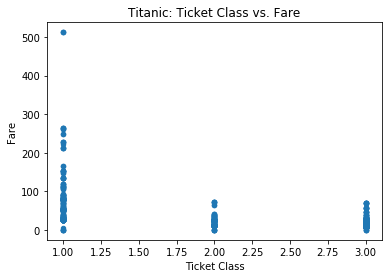

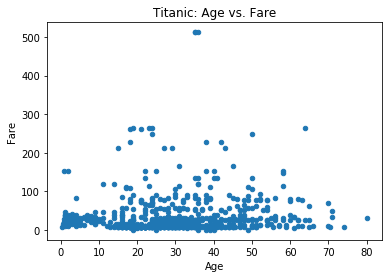

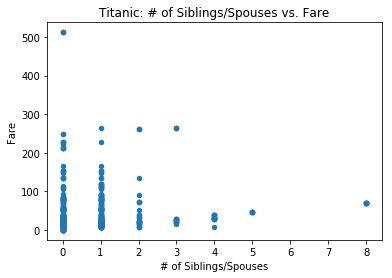

In [3]:
# reading the titanic data from excel sheet
titanic_df = pd.read_csv('titanic/train.csv')

# plotting ticket class vs. fare
titanic_df.plot.scatter("Pclass", "Fare")
plt.title("Titanic: Ticket Class vs. Fare")
plt.xlabel("Ticket Class")
plt.ylabel("Fare")

# plotting age vs. fare
titanic_df.plot.scatter("Age", "Fare")
plt.title("Titanic: Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")

# plotting number of siblings vs. fare
titanic_df.plot.scatter("SibSp", "Fare")
plt.title("Titanic: # of Siblings/Spouses vs. Fare")
plt.xlabel("# of Siblings/Spouses")
plt.ylabel("Fare");

**Question:** How would you describe these variables?

Run the cell below to find the new dataset we found to work with!

In [4]:
mpg = pd.read_csv("./mpg.csv", index_col="name") # load mpg dataset
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) # remove columns with missing horsepower values
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0) # split into training set and test set
mpg_train, mpg_validation = train_test_split(mpg_train, test_size = .5, random_state = 0)
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corolla,34,4,108,70,2245,16,82,3
buick century,17,6,231,110,3907,21,75,1
cadillac eldorado,23,8,350,125,3900,17,79,1
bmw 320i,21,4,121,110,2600,12,77,2
ford fairmont futura,24,4,140,92,2865,16,82,1


Here we've chosen the `mpg` dataset, which tells us various attributes of different cars, including a car's make and model, miles per gallon, number of cylinders, weight, and more! We're going to be trying to see which features affect a car's `mpg`, and our goal is to create a model that accurately predicts `mpg` given other attributes of the car. 

You'll notice that we separated the `mpg` data into two separate dataframes, `mpg_train` and `mpg_test`. We'll get into why in next lecture, but for now, make sure to do all of your analysis and model creation on the `mpg_train` dataset! 


*Hint:* Hitting `shift-tab` with the cursor on the name of a function will bring up helpful documentation about how to use the function

Since we are looking at the dat a for cars, what could be a useful variable to predict?
Furthermore, to predict this variable, what explanatory or response variable should we use?

In [ ]:
x1 = ...
y1 = ...

In [ ]:
mpg_train.plot.scatter(...)

`sklearn`'s `linear_model` module makes it really easy to make linear models! There's a lot of different types of linear models implemented in the `linear_model` module, which you can take a look at [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) if you're interested, but for today we'll be using `LinearRegression`, which we've imported for you in the cell below. Try reading the documentation to figure out what the `fit()` function expects as input to correctly fit our model to the `mpg_train` data!

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Initialize our linear regression model
linear_model = LinearRegression()

X = ...
Y = ...

# Fit the model to the data
linear_model.fit(X, Y)

Once you've got it working you'll notice that it seems like nothing happened. However, behind the scenes, our `linear_model` variable has now been fit to the data we passed into the `fit()` function! We can see what the `slope` and `intercept` are by looking into the `coef_` and `intercept_` attributes of our `linear_model`.

In [ ]:
linear_model.coef_, linear_model.intercept_

You might notice that, while the `intercept_` is a single scalar value, `coef_` returns an array. This is because you can choose to fit your model to multiple explanatory variables (hence the list form of `feature_cols`). When you define multiple explanatory variables, the `coef_` will contain a separate coefficient for each explanatory variable you chose! You'll be able to explore that in a bit, but for now let's take a look at what our linear model looks like relative to our original data.

We've provided the skeleton for a helper function called `overlay_simple_linear_model`. Try to fill out the function so that it plots a scatterplot with the linear model overlaid on top.

*Hint:* If you press `tab` after a `[object].` or `[package].`, Jupyter will show you a list of valid functions defined for that object type or package.

In [ ]:
def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    """
    This function plots a simple linear model on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs linear model overlaid on scatterplot
    """
    
    x = np.arange(max(data[x_name])).reshape(-1, 1) # a 2D array of integers between 0 and the maximum value of the x_name column
    y = linear_model.___ # replace ___ with correct function 
    
    
    data.plot.scatter(...) # scatter plot of x_name vs. y_name
    
    plt.plot(...)
    plt.title("Linear Model vs. Data: " + x_name + " vs. " + y_name)
    plt.show()

In [ ]:
# If you wrote the function above correctly, the output should look like this
overlay_simple_linear_model(mpg_train, ..., "mpg", linear_model)

<a id='interpreting_model'></a>
### Interpreting the Model

You're probably thinking "COOL! This looks like a pretty good representation of the data! But what do these coefficients even mean?" That is a great question! As you might have guessed, the `intercept` term is where our line intersects with the y-axis, or when our predictor variable has a value of 0. In relation to our model, it's our prediction for `mpg` given a predictor variable value of 0. The `slope` term is a little more complicated. Yes, it is the slope of the line, but how do we interpret it in the relationship between `mpg` and our explanator?

<a id='assessment'></a>
### Assessing the Model
<a id='r_squared'></a>
#### Coefficient of Determination ($R^2$)
Another question you might have is, how do we know how good our model is? One way of measuring how well your model fits the data is the $R^2$ coefficient, or the **coefficient of determination**. Basically, what the $R^2$ represents is how much can our data vary but still be predicted accurately by the explanatory variable. If you want to look into the mathematical definition of $R^2$, you can check out the [Wikipedia page](https://en.wikipedia.org/wiki/Coefficient_of_determination).

We can obtain our model's $R^2$ value by using our `linear_model`'s `score()` function, like so:

In [ ]:
linear_model.score(...) # you'll only need to use variables that we've already defined

Woohoo! If you used `displacement`, our model accurately predicts 66% of the variation in `mpg`. Is this good? Since $R^2$ is a proportion, it's value is always between $0$ and $1$. 

**Question:** What does it mean for $R^2$ to have a value of 1? What about 0?


**Exercise:** Can you think of a possible feature you could use to make our model have an $R^2$ value of $1$?

In [ ]:
linear_model2 = LinearRegression()

X2 = ...

linear_model2.fit(X2, Y)

r_squared = ...

r_squared

<a id='residual_plots'></a>
#### Residual Plots
Another way of analyzing your model is through *residual plots*. A **residual plot** is kind of what you'd think – it plots your residuals against the corresponding $x$ values. If you see interesting patterns in your residual plot, it's indicative of some *bias* in your model – your error isn't due to randomness in the data but because of an underlying problem in the way you've defined the relationship between your variables. 

Fill in the blanks in the `plot_simple_residuals()` function, so we can take a look at the residual plot.

In [ ]:
def plot_simple_residuals(data, x_name, y_name, linear_model):
    """
    This function plots a residual plot based off of a simple linear model 
    on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs residual plot resulting from linear model overlaid on scatterplot
    """
    X = ...
    Y = ...
    residuals = ...
    
    ... # plot residuals
    plt.axhline(y=0, color='r', linestyle='-') # plots line at y = 0
    plt.title("Residual Plot: " + x_name + " vs. " + y_name)
    plt.xlabel(x_name)
    plt.ylabel("Residuals")
    plt.show()

In [ ]:
plot_simple_residuals(mpg_train, ..., 'mpg', linear_model)

As you can see, the residuals aren't scattered randomly around the y-axis. The points are more spread out vertically for smaller values of `displacement` and less scattered vertically for larger values. Furthermore, in the middle the residuals are mostly above the line, while on the left and right side, the residuals tend to be below the line. Such a pattern as this one suggests that our model isn't that great at describing the relationship between `displacement` and `mpg`, and there's some fundamental issue with the assumption that the relationship can be modeled by a simple linear relationship. [Here](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)'s some more information about how to interpret different patterns in residual plots and how you can change your model to fix these errors.

<a id='qq_plots'></a>
#### Q-Q Plots
A **Q-Q plot** (quantile-quantile plot) is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. Here’s an example of a Normal Q-Q plot when both sets of quantiles truly come from standard normal distributions.

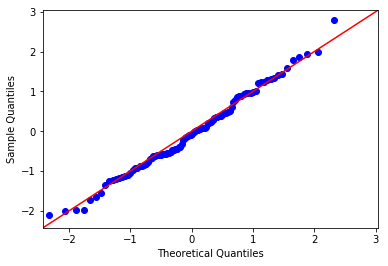

In [14]:
import statsmodels.api as sm
from scipy import stats
nsample = 100
np.random.seed(134)
x = stats.norm.rvs(loc=0, scale=1, size=nsample)
fig = sm.qqplot(x, line = '45')
plt.show()

Q-Q plot is very useful for checking the normality assumption of linear regression: by plotting the distribution of the data at hand against the distribution of the ideal normal variable, we are able to observe how closely our data follows a normal distribution. If roughly all the points lie on the 45$^{\circ}$ line, then we assume the normality assumption is met.

# Thomas, your second part of the garbage starts here 


<a id='when_to_use'></a>
### When Can I Use a Linear Model?
Let's talk about some of the assumptions of linear regression, so you know when it's appropriate to use one. 
- There's a linear relationship between the response variable and the explanatory variables.
- There's no pattern in the residual plot.

Now that you're a master of simple linear regression, you're probably thinking "WHY CAN'T I USE MORE EXPLANATORY VARIABLES? What if I think `mpg` could be better predicted if I knew *two* of the variables? Wouldn't that make my model better?" Why, Ms/Mr. Genius Statistician, you *can* use more explanatory variables! That leads us to *multiple linear regression*.

<a id='multiple'></a>
## Multiple Linear Regression
**Multiple linear regression** is an extension to the simple linear regression model with multiple explanatory variables instead of just one. Note that this is usually the case in reality: for example, your wage doesn't just depend on your education level.

With two explanatory variables, we can still visualize the model in a three-dimensional graph, but as we add more and more variables it's pretty much impossible to plot it (can you imagine what a 5D graph would look like?). 

Below is a code chunk that plots the scatterplots of `weight` and `displacement` against `mpg`, as well as the corresponding linear model. It's interactive, so you can drag it around to get a better look at how the model fits the data!

You'll notice that the model is no longer a line – it's a plane. This is the 3D analog to a line. Just as a line defines one value for $y$ for any given $x$, a plane defines one value for $z$ for any pair of $(x, y)$.

In [ ]:
%matplotlib notebook
plot_multiple_linear_regression(mpg_train, "displacement", "weight", "mpg")

In [ ]:
multiple_model = LinearRegression()
X3 = ... # select both the displacement and weight columns from mpg_train
multiple_model.fit(X3, Y)

print("Multiple Linear Regression R^2:", multiple_model.score(X3, Y))

Since we're in the d-dimensional world now, we have a model $f_{\boldsymbol{\theta}}(x_1, x_2, ..., x_d)$. We would still like to model a single scalar output $y_i$. We continue our assumption that our model is linear, meaning we know that $f_{\boldsymbol{\theta}}$ looks like this:
$$f_{\boldsymbol{\theta}}(x_1, x_2, ..., x_d) = \theta_0+\theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_d x_d$$

 Because mathematicians are efficient (not lazy), we can write $f_\theta$ as an inner product, where $\mathbf{\theta}$ is now a **vector** and $x$ is now a $d$-dimensional vector:
$$f_{\boldsymbol{\theta}}(x) = \mathbf{x}^T \boldsymbol{\theta}$$
 
We can consider each observation $\mathbf{x}_i$ as a vector of length $d+1$, with 1 added for the intercept term $\theta_0$. Notice that now we are attempting to calculate $d+1$ values in $\mathbf{\theta}$ instead of 2 values previously.  With our current model, to find the optimal $\mathbf{\theta}$ we are minimizing
$$\sum_{i=1}^n (y_i - \mathbf{x}_i^T \boldsymbol{\theta})^2 = (\mathbf{y}-\mathbf{X}\boldsymbol{\boldsymbol{\theta}})^T(\mathbf{y}-\mathbf{X}\boldsymbol{\boldsymbol{\theta}}),$$ where $$\mathbf{X} = \begin{bmatrix} \ 1 & x_{11} & \dots & x_{1,d} \\ 1 & x_{21} & \dots & x_{2,d} \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_{n1} & \dots & x_{n,d} \end{bmatrix}; \mathbf{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_d \end{bmatrix}; \mathbf y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$$

The derivation requires matrix calculus so we'll skip it for now. You can check [here](https://en.wikipedia.org/wiki/Linear_regression#Simple_and_multiple_linear_regression) if you're interested. After some math, we get that the optimal $\theta$ takes the following form: $$\boldsymbol{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

**Question**: Is this an $R^2$ value we want? Why or why not?

In [ ]:
dispX = ... # select just displacement from mpg_train
wtX = ...# select just weight from mpg_train

linear_model.fit(dispX, Y)
print("Simple Linear Regression (displacement) R^2:", linear_model.score(dispX, Y))

linear_model.fit(wtX, Y)
print("Simple Linear Regression (weight) R^2:", linear_model.score(wtX, Y))

**Question**: What do you notice about the $R^2$ values of the simple linear regression models and the multiple case?

## Resources/References
- [Matplotlib Tutorial - Nicolas P. Rougier](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)